# Range Kutta 2, Modified Euler and Odeint

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

In [2]:
# Aparting second order ode with two coupled first order ode.

def f1(x,z):
    
    dxdt = z
    
    return dxdt

def f2(x,z, alpha):
    
    dzdt = -1 * x * (1 - alpha * x) # k = 1
    
    return dzdt

In [3]:
# Declaring intiial condisitonas.
x = 0
z = 1
t = 0
h = 0.1
alpha = 0  # 0.9
n = int(20//h + 1)

In [4]:
# RK2 method designed that returns time velocity and position
def rk2(h, x, z, t, n, alpha):
    position = []
    velocity = []
    time = []
    for i in range(n):
        position.append(x)
        velocity.append(z)
        time.append(t)
        
        k1 = h * f1(x, z)
        l1 = h * f2(x, z, alpha)
        k2 = h * f1(x + k1, z + l1)
        l2 = h * f2(x + k1, z + l1, alpha)
    
        x = x + (k1+k2)/2
        z = z + (l1+l2)/2
        t = t + h
    return [position, velocity, time]

In [5]:
sol = rk2(h, x, z, t, n,alpha)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


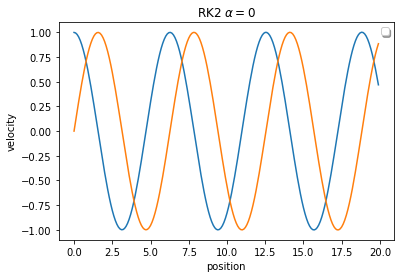

In [6]:
x_rk2 = sol[0]
v_rk2 = sol[1]
t_rk = sol[2]
fig, ax = plt.subplots()
plt.plot(t_rk,v_rk2)
plt.plot(t_rk, x_rk2)
ax.set_title(r'RK2 $\alpha = 0$')
ax.set_xlabel('position')
ax.set_ylabel('velocity')
ax.legend(shadow=True, fancybox=True)


In [8]:
# Solving ode by odeint.

def f(u,x):
    return (u[1], -1 * u[0] * (1))  # (1-alphax) where alpha = 0 k = 1
x0 = [x, z]
ts = sol[2]
us = odeint(f, x0, ts)
xs = us[:,0]
vs = us[:,1]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


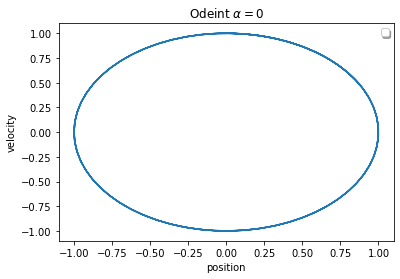

In [10]:

fig, ax = plt.subplots()
plt.plot(xs,vs)
ax.set_title(r'Odeint $\alpha = 0$')
ax.set_xlabel('position')
ax.set_ylabel('velocity')
ax.legend(shadow=True, fancybox=True)

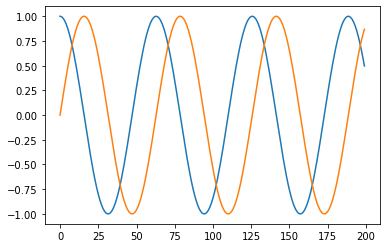

In [11]:
V_analytic = np.cos(ts)
plt.plot(V_analytic)
X_analytic = np.sin(ts)
plt.plot(X_analytic)
    

In [12]:
# Question 2

In [13]:
# Modified Euler algorithm.

def mod_euler(h, n, v, x, alpha, t):
    
    position = np.zeros(n)
    velocity = np.zeros(n)
    time = []
    position[0] = x
    velocity[0] = v
    
    for i in range(n-1):
        
        time.append(t)
        
        x_p = position[i] + h * velocity[i]
        velocity[i+1] = velocity[i]-h*1*x_p*(1-alpha*x_p) # alpha 0 and 0.9
        position[i+1] = position[i] + h * (velocity[i] + velocity[i+1])/2
        t = t + h
        
    return [position[:-1], velocity, time]

In [15]:
sol_eu = mod_euler(h, n, z, x, 0, t) # alpha = 0
#sol_eua = mod_euler(h, n, z, x, 0.9, t) # alpha = 0.9

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


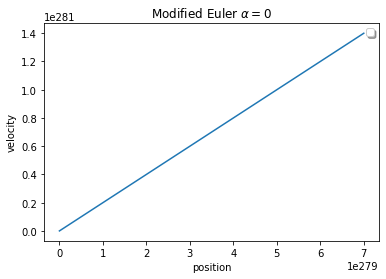

In [17]:

fig, ax = plt.subplots()
plt.plot(sol_eua[0], sol_eua[1][:-1])
ax.set_title(r'Modified Euler $\alpha = 0$')
ax.set_xlabel('position')
ax.set_ylabel('velocity')
ax.legend(shadow=True, fancybox=True)

In [18]:
# Plotting eveerything

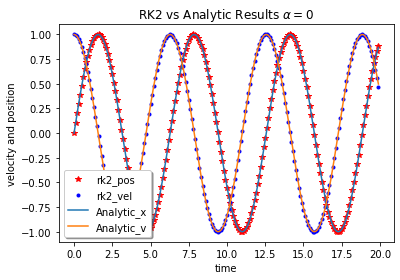

In [19]:
# Plotting designed rk2

fig, ax = plt.subplots()
plt.plot(t_rk , x_rk2,'r*', label='rk2_pos')
plt.plot(t_rk, v_rk2,'b.', label='rk2_vel')
plt.plot(ts, X_analytic, label='Analytic_x')
plt.plot(ts, V_analytic, label='Analytic_v')
ax.set_title(r'RK2 vs Analytic Results $\alpha = 0$')
ax.set_xlabel('time')
ax.set_ylabel('velocity and position')
ax.legend(shadow=True, fancybox=True, loc = 'lower left')




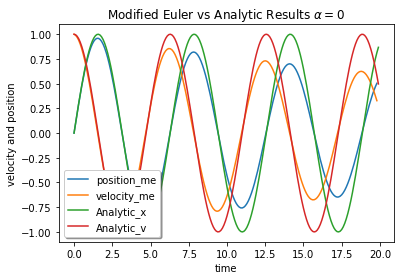

In [21]:
# Modified Euler Plots

fig, ax = plt.subplots()
plt.plot(sol_eu[2], sol_eu[0], label='position_me')
plt.plot(sol_eu[2], sol_eu[1][:-1], label='velocity_me')
plt.plot(ts, X_analytic, label='Analytic_x')
plt.plot(ts, V_analytic, label='Analytic_v')
ax.set_title(r'Modified Euler vs Analytic Results $\alpha = 0$')
ax.set_xlabel('time')
ax.set_ylabel('velocity and position')
ax.legend(shadow=True, fancybox=True, loc = 'lower left')
